# Descripción

La compañía de seguros Sure Tomorrow quiere resolver varias tareas con la ayuda de machine learning y te pide que evalúes esa posibilidad.
- Tarea 1: encontrar clientes que sean similares a un cliente determinado. Esto ayudará a los agentes de la compañía con el marketing.
- Tarea 2: predecir la probabilidad de que un nuevo cliente reciba una prestación del seguro. ¿Puede un modelo de predictivo funcionar mejor que un modelo dummy?
- Tarea 3: predecir el número de prestaciones de seguro que un nuevo cliente pueda recibir utilizando un modelo de regresión lineal.
- Tarea 4: proteger los datos personales de los clientes sin afectar al modelo del ejercicio anterior. Es necesario desarrollar un algoritmo de transformación de datos que dificulte la recuperación de la información personal si los datos caen en manos equivocadas. Esto se denomina enmascaramiento u ofuscación de datos. Pero los datos deben protegerse de tal manera que no se vea afectada la calidad de los modelos de machine learning. No es necesario elegir el mejor modelo, basta con demostrar que el algoritmo funciona correctamente.


# Preprocesamiento y exploración de datos

## Inicialización

In [1]:
#pip install scikit-learn --upgrade

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import sklearn.linear_model
import sklearn.metrics
#import sklearn.neighbors
from sklearn.neighbors import NearestNeighbors

import sklearn.preprocessing

from sklearn.model_selection import train_test_split

from IPython.display import display


import math
from sklearn.linear_model import LinearRegression

In [3]:
def rename(data):
    '''
    Renombrar columnas: Bucle en los encabezados para :
    1. Poner todo en minúsculas
    2. Eliminar los espacios
    3. Remplazar espacio entre palabras por "_"
    '''
    new_col_names = []

    for name in data.columns:
        # Luego, pon todas las letras en minúsculas
        name_lowered = name.lower()
        # Elimina los espacios al principio y al final
        name_stripped = name_lowered.strip()
        # Por último, reemplaza los espacios entre palabras por guiones bajos
        name_no_spaces = name_stripped.replace(' ', '_')
        # Agrega el nuevo nombre a la lista de nuevos nombres de columna
        new_col_names.append(name_no_spaces)

    # Reemplaza los nombres anteriores por los nuevos
    data.columns = new_col_names


In [4]:
# mostrar información del DataFrame
def info(df):
    display(df.sample(10))
    print()
    print(df.info())
    print()
    print(df.describe())
    print()
    print('Duplicated: ',df.duplicated().sum())
    print()
    print('Null values %:')
    print(100*df.isnull().sum()/len(df))


## Carga de datos

Carga los datos y haz una revisión básica para comprobar que no hay problemas obvios.

In [2]:
df = pd.read_csv('./datasets/insurance_us.csv')

Renombramos las columnas para que el código se vea más coherente con su estilo.

In [6]:
rename(df)

In [7]:
info(df)

,gender,age,salary,family_members,insurance_benefits
1461,1,38.0,36100.0,0,0
4018,0,22.0,48200.0,2,0
2751,1,24.0,30900.0,1,0
2684,0,18.0,32400.0,4,0
4764,0,30.0,31400.0,2,0
1744,1,40.0,41900.0,2,0
1074,1,29.0,32800.0,1,0
960,1,41.0,42100.0,0,0
1702,1,23.0,18200.0,2,0
4279,1,40.0,51900.0,0,0



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              5000 non-null   int64  
 1   age                 5000 non-null   float64
 2   salary              5000 non-null   float64
 3   family_members      5000 non-null   int64  
 4   insurance_benefits  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB
None

            gender          age        salary  family_members  \
count  5000.000000  5000.000000   5000.000000     5000.000000   
mean      0.499000    30.952800  39916.360000        1.194200   
std       0.500049     8.440807   9900.083569        1.091387   
min       0.000000    18.000000   5300.000000        0.000000   
25%       0.000000    24.000000  33300.000000        0.000000   
50%       0.000000    30.000000  40200.000000        1.000000   
75%       1.000000    37.000000  4660

In [8]:
# puede que queramos cambiar el tipo de edad (de float a int) aunque esto no es crucial

# escribe tu conversión aquí si lo deseas:
df['age'] = df['age'].astype(int)

In [9]:
print('Porcentaje de duplicados explícitos:',df.duplicated().sum()*100/len(df),'%')

Porcentaje de duplicados explícitos: 3.06 %


<div class="alert alert-block alert-info">
<b>

* Podemos eliminar los duplicados, ya que no aportan información adicional, y son solo el  3% de los datos.

* No hay valores nulos en el dataset.
</b></div>

In [10]:
# Eliminar duplicados explícitos
df = df.drop_duplicates().reset_index(drop=True)


In [11]:
# comprueba que la conversión se haya realizado con éxito
info(df)

,gender,age,salary,family_members,insurance_benefits
2585,1,39,42100.0,0,0
2734,0,23,40600.0,0,0
1114,1,30,35500.0,3,0
748,0,41,32100.0,0,0
278,1,34,39900.0,1,0
781,1,37,51900.0,1,0
946,1,18,38800.0,1,0
110,1,39,36600.0,1,0
1471,0,38,31400.0,1,0
408,0,38,54200.0,1,0



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4847 entries, 0 to 4846
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              4847 non-null   int64  
 1   age                 4847 non-null   int64  
 2   salary              4847 non-null   float64
 3   family_members      4847 non-null   int64  
 4   insurance_benefits  4847 non-null   int64  
dtypes: float64(1), int64(4)
memory usage: 189.5 KB
None

            gender          age        salary  family_members  \
count  4847.000000  4847.000000   4847.000000     4847.000000   
mean      0.498453    31.023932  39895.811842        1.203425   
std       0.500049     8.487995   9972.953985        1.098664   
min       0.000000    18.000000   5300.000000        0.000000   
25%       0.000000    24.000000  33200.000000        0.000000   
50%       0.000000    30.000000  40200.000000        1.000000   
75%       1.000000    37.000000  4660

<div class="alert alert-block alert-info">
<b>

* Aproximadamente hay 50% de hombre y 50% de mujeres en el dataset.
* La edad promedio de los clientes es de 39 años.
* La edad mínima es de 18 años y la máxima de 65 años.
* El salario promedio es de 40,000.
* El salario mínimo es de 30,000 y el máximo de 50,000.
* El número promedio de familiares es de 1
* El número mínimo de familiares es de 0 y el máximo de 2.
* El número promedio de prestaciones es de 0.5.
* El número mínimo de prestaciones es de 0 y el máximo de 2.
</b></div>


## Análisis exploratorio de datos

Vamos a comprobar rápidamente si existen determinados grupos de clientes observando el gráfico de pares.

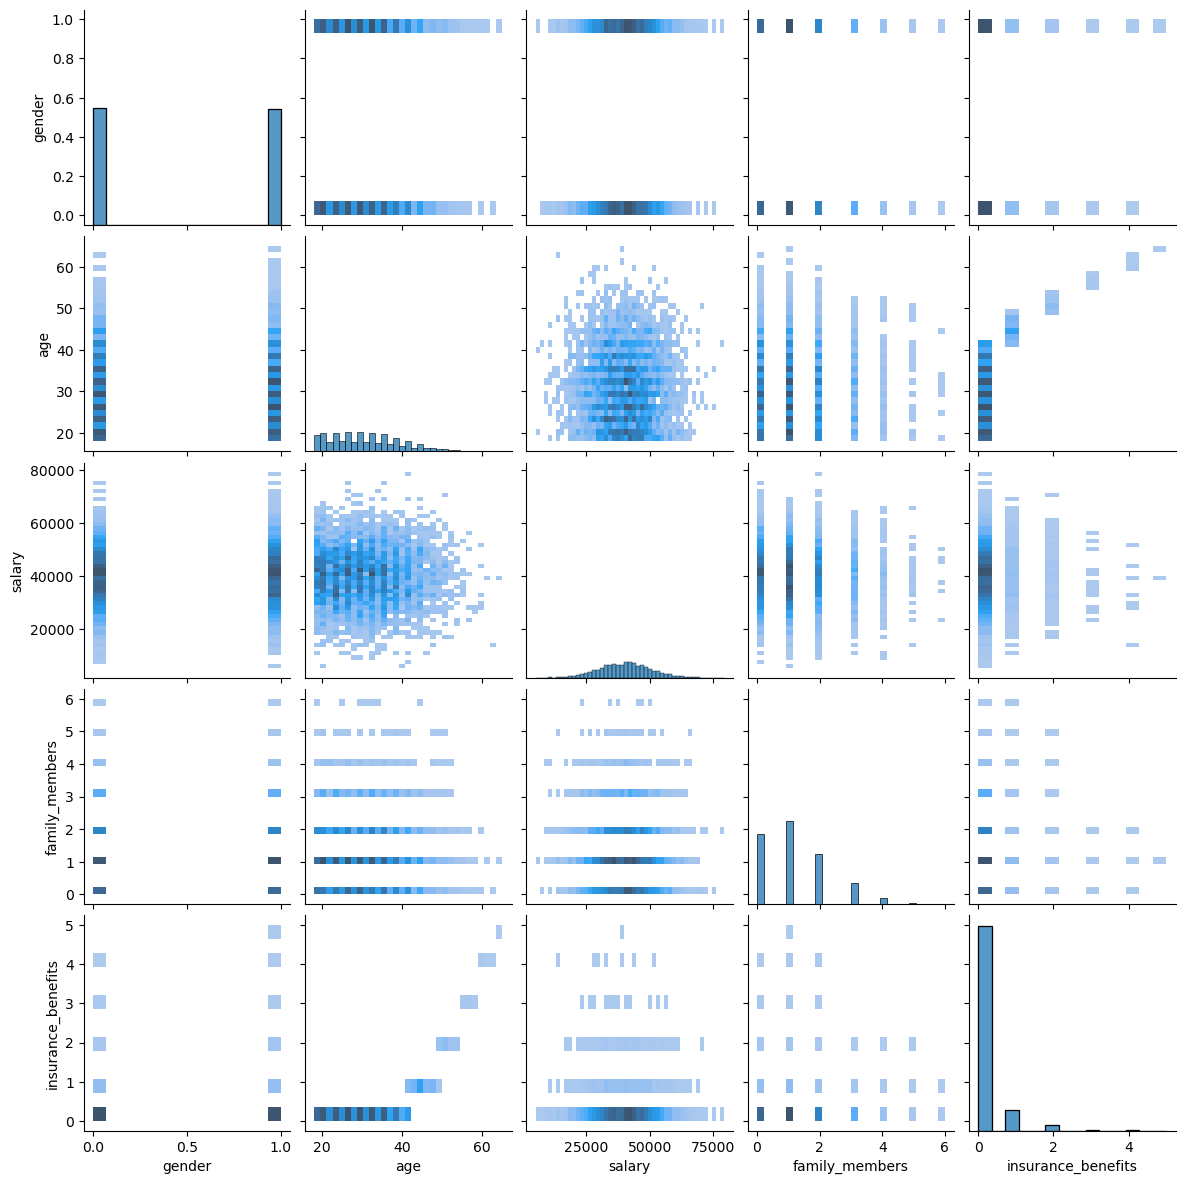

In [12]:
g = sns.pairplot(df, kind='hist')
g.fig.set_size_inches(12, 12)

De acuerdo, es un poco complicado detectar grupos obvios (clústeres) ya que es difícil combinar diversas variables simultáneamente (para analizar distribuciones multivariadas). Ahí es donde LA y ML pueden ser bastante útiles.

# Tarea 1. Clientes similares

En el lenguaje de ML, es necesario desarrollar un procedimiento que devuelva los k vecinos más cercanos (objetos) para un objeto dado basándose en la distancia entre los objetos.
Es posible que quieras revisar las siguientes lecciones (capítulo -> lección)- Distancia entre vectores -> Distancia euclidiana
- Distancia entre vectores -> Distancia Manhattan

Para resolver la tarea, podemos probar diferentes métricas de distancia.

Escribe una función que devuelva los k vecinos más cercanos para un $n^{th}$ objeto basándose en una métrica de distancia especificada. A la hora de realizar esta tarea no debe tenerse en cuenta el número de prestaciones de seguro recibidas.
Puedes utilizar una implementación ya existente del algoritmo kNN de scikit-learn (consulta [el enlace](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html#sklearn.neighbors.NearestNeighbors)) o tu propia implementación.
Pruébalo para cuatro combinaciones de dos casos- Escalado
  - los datos no están escalados
  - los datos se escalan con el escalador [MaxAbsScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MaxAbsScaler.html)
- Métricas de distancia
  - Euclidiana
  - Manhattan

Responde a estas preguntas:- ¿El hecho de que los datos no estén escalados afecta al algoritmo kNN? Si es así, ¿cómo se manifiesta?- ¿Qué tan similares son los resultados al utilizar la métrica de distancia Manhattan (independientemente del escalado)?

In [13]:
# Seleccionar las características 
feature_names = df.columns[:-1]

In [14]:
import pandas as pd
from sklearn.neighbors import NearestNeighbors

def get_knn(df, n, k, metric):
    """
    Devuelve los k vecinos más cercanos

    :param df: DataFrame de pandas utilizado para encontrar objetos similares dentro del mismo lugar
    :param n: número de objetos para los que se buscan los vecinos más cercanos
    :param k: número de vecinos más cercanos a devolver
    :param metric: nombre de la métrica de distancia
    """
   
    # Modelo NearestNeighbors
    nbrs = NearestNeighbors(n_neighbors=k, metric=metric)
    
    # Entrenar el modelo
    nbrs.fit(df[feature_names])
    
    # Encontrar los vecinos más cercanos
    nbrs_distances, nbrs_indices = nbrs.kneighbors([df.iloc[n][feature_names].values], return_distance=True)
    
    # Resultados
    df_res = pd.concat([
        df.iloc[nbrs_indices[0]], 
        pd.DataFrame(nbrs_distances.T, index=nbrs_indices[0], columns=['distance'])
        ], axis=1)
    
    return df_res


In [15]:
result_ecludean = get_knn(df, n=0, k=5, metric='euclidean')
print(result_ecludean)

      gender  age   salary  family_members  insurance_benefits  distance
0          1   41  49600.0               1                   0  0.000000
1992       1   41  49600.0               0                   0  1.000000
1214       0   42  49600.0               0                   1  1.732051
3916       1   44  49600.0               2                   1  3.162278
3334       0   38  49600.0               0                   0  3.316625


/home/isadoji/Storage/Software/miniconda3/envs/py310/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


In [16]:
result_manhattan = get_knn(df, n=0, k=5, metric='manhattan')
print(result_manhattan)

      gender  age   salary  family_members  insurance_benefits  distance
0          1   41  49600.0               1                   0       0.0
1992       1   41  49600.0               0                   0       1.0
1214       0   42  49600.0               0                   1       3.0
3916       1   44  49600.0               2                   1       4.0
810        1   37  49600.0               2                   0       5.0


/home/isadoji/Storage/Software/miniconda3/envs/py310/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


In [17]:
# Comparar los resultados
similarity = result_ecludean.index.equals(result_manhattan.index)
print("\n¿Son similares los resultados? ", similarity)


¿Son similares los resultados?  False


Escalar datos.

In [18]:
transformer_mas = sklearn.preprocessing.MaxAbsScaler().fit(df[feature_names].to_numpy())

df_scaled = df.copy()
df_scaled.loc[:, feature_names] = transformer_mas.transform(df[feature_names].to_numpy())

In [19]:
df_scaled.sample(5)

,gender,age,salary,family_members,insurance_benefits
4623,0.0,0.584615,0.630380,0.000000,0
2371,0.0,0.369231,0.464557,0.000000,0
3124,0.0,0.430769,0.420253,0.166667,0
1946,1.0,0.692308,0.408861,0.333333,1
4063,0.0,0.553846,0.553165,0.000000,0


Ahora, vamos a obtener registros similares para uno determinado, para cada combinación

In [20]:
resultado_ecludean_scaled = get_knn(df_scaled, n=0, k=5, metric='euclidean')
print(resultado_ecludean_scaled)

      gender       age    salary  family_members  insurance_benefits  distance
0        1.0  0.630769  0.627848        0.166667                   0  0.000000
2632     1.0  0.630769  0.634177        0.166667                   0  0.006329
133      1.0  0.615385  0.636709        0.166667                   0  0.017754
4720     1.0  0.646154  0.637975        0.166667                   1  0.018418
3192     1.0  0.646154  0.651899        0.166667                   1  0.028550


/home/isadoji/Storage/Software/miniconda3/envs/py310/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


In [21]:
resultado_manhattan_scaled = get_knn(df_scaled, n=0, k=5, metric='manhattan')
print(resultado_manhattan_scaled)

      gender       age    salary  family_members  insurance_benefits  distance
0        1.0  0.630769  0.627848        0.166667                   0  0.000000
2632     1.0  0.630769  0.634177        0.166667                   0  0.006329
133      1.0  0.615385  0.636709        0.166667                   0  0.024245
4720     1.0  0.646154  0.637975        0.166667                   1  0.025511
2072     1.0  0.630769  0.596203        0.166667                   0  0.031646


/home/isadoji/Storage/Software/miniconda3/envs/py310/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


In [22]:
# Comparar los resultados
similarity = resultado_ecludean_scaled.index.equals(resultado_manhattan_scaled.index)
print("\n¿Son similares los resultados escalados? ", similarity)


¿Son similares los resultados escalados?  False


<div class="alert alert-block alert-info">
<b>

**¿El hecho de que los datos no estén escalados afecta al algoritmo kNN? Si es así, ¿cómo se manifiesta?** 

Sí, ya que k-NN se basa en la distancia entre puntos de datos para determinar los vecinos más cercanos. 

**Cómo se manifiesta:**

1. Las características con valores más grandes tendrán una mayor influencia en el cálculo de la distancia, lo que puede hacer que el algoritmo ignore las características con valores más pequeños.

2. Debido a la influencia desproporcionada de las características con mayor escala, el algoritmo puede seleccionar vecinos que no son realmente los más cercanos en términos de similitud general, lo que afecta la precisión del modelo.

3. La falta de escalado puede llevar a un rendimiento deficiente del modelo, ya que las predicciones se basarán en distancias sesgadas.


**¿Qué tan similares son los resultados al utilizar la métrica de distancia Manhattan (independientemente del escalado)?** 


In [23]:

# Definir una función para calcular la distancia Manhattan 
# entre características
def manhattan_distance(x, y):
    return np.sum(np.abs(x - y))

# Calcular la matriz de distancias Manhattan
def calculate_manhattan_distances(df):
    feature_names = df.columns
    n_features = len(feature_names)
    distance_matrix = np.zeros((n_features, n_features))
    
    for i in range(n_features):
        for j in range(n_features):
            if i != j:
                distance_matrix[i, j] = manhattan_distance(df[feature_names[i]], df[feature_names[j]])
    
    return pd.DataFrame(distance_matrix, index=feature_names, columns=feature_names)


In [24]:
# Calcular la matriz de distancias Manhattan
manhattan_distances = calculate_manhattan_distances(df_scaled)

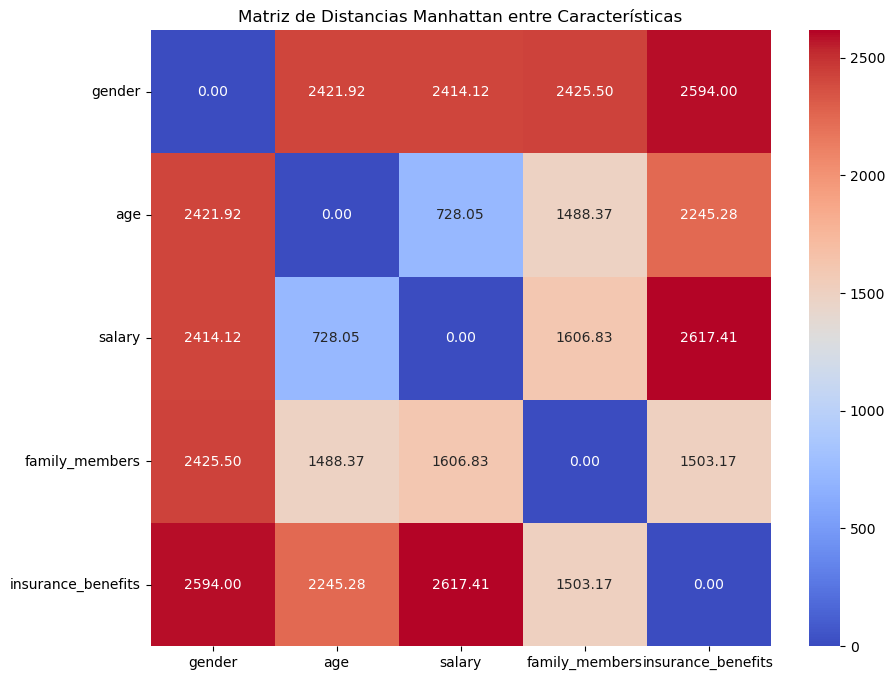

In [25]:
# Visualizar la matriz de distancias
plt.figure(figsize=(10, 8))
sns.heatmap(manhattan_distances, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Distancias Manhattan entre Características')
plt.show()

<div class="alert alert-block alert-info">
<b>

La matriz de distancias Manhattan te permitirá ver cómo de similares son las características entre sí en términos de la distancia Manhattan. Las características con distancias más pequeñas son más similares entre sí, mientras que las características con distancias más grandes son menos similares.

Para este caso, la matriz de distancias Manhattan entre características tienen  distancias muy grandes,por lo que  las características no son similares.

</b></div>

# Tarea 2. ¿Es probable que el cliente reciba una prestación del seguro?

En términos de machine learning podemos considerarlo como una tarea de clasificación binaria.

Con el valor de `insurance_benefits` superior a cero como objetivo, evalúa si el enfoque de clasificación kNN puede funcionar mejor que el modelo dummy.
Instrucciones:
- Construye un clasificador basado en KNN y mide su calidad con la métrica F1 para k=1...10 tanto para los datos originales como para los escalados. Sería interesante observar cómo k puede influir en la métrica de evaluación y si el escalado de los datos provoca alguna diferencia. Puedes utilizar una implementación ya existente del algoritmo de clasificación kNN de scikit-learn (consulta [el enlace](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)) o tu propia implementación.- Construye un modelo dummy que, en este caso, es simplemente un modelo aleatorio. Debería devolver "1" con cierta probabilidad. Probemos el modelo con cuatro valores de probabilidad: 0, la probabilidad de pagar cualquier prestación del seguro, 0.5, 1.
La probabilidad de pagar cualquier prestación del seguro puede definirse como
$$
P\{\text{prestación de seguro recibida}\}=\frac{\text{número de clientes que han recibido alguna prestación de seguro}}{\text{número total de clientes}}.
$$

Divide todos los datos correspondientes a las etapas de entrenamiento/prueba respetando la proporción 70:30.

In [26]:
df['insurance_benefits'].value_counts()


0    4284
1     423
2     114
3      18
4       7
5       1
Name: insurance_benefits, dtype: int64

In [27]:
# сalcula el objetivo
df['insurance_benefits_received'] = np.where(df['insurance_benefits'] == 0, 0, 1)
df_scaled['insurance_benefits_received'] = np.where(df_scaled['insurance_benefits'] == 0, 0, 1)

In [28]:
# comprueba el desequilibrio de clases con value_counts()
df['insurance_benefits_received'].value_counts()*100/len(df)

0    88.384568
1    11.615432
Name: insurance_benefits_received, dtype: float64

<div class="alert alert-block alert-info">
<b>

* La clase mayoritaria (0 = no) representa el 88% de los datos
* La clase minoritaria (1 = si) representa el 12% de los datos
</b></div>


In [29]:
def eval_classifier(y_true, y_pred):
    
    f1_score = sklearn.metrics.f1_score(y_true, y_pred)
    print(f'F1: {f1_score:.2f}')
    cm = sklearn.metrics.confusion_matrix(y_true, y_pred, normalize='all')
    #sns.heatmap(cm, annot=True, cmap='coolwarm', fmt=".2f")
# si tienes algún problema con la siguiente línea, reinicia el kernel y ejecuta el cuaderno de nuevo    cm = sklearn.metrics.confusion_matrix(y_true, y_pred, normalize='all')
    print('Matriz de confusión')
    print(cm)

In [30]:
# generar la salida de un modelo aleatorio

def rnd_model_predict(P, size, seed=42):

    rng = np.random.default_rng(seed=seed)
    return rng.binomial(n=1, p=P, size=size)

In [31]:
y = df['insurance_benefits_received']
X = df.drop(['insurance_benefits_received', 'insurance_benefits'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)

In [32]:
model1 = sklearn.neighbors.KNeighborsClassifier()
model1.fit(X_train, y_train)
predicted_test = model1.predict(X_test)
eval_classifier(y_test, predicted_test)

F1: 0.23
Matriz de confusión
[[0.87766323 0.00687285]
 [0.09965636 0.01580756]]


In [33]:
scaler = sklearn.preprocessing.MaxAbsScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [34]:
model2 = sklearn.neighbors.KNeighborsClassifier()
model2.fit(X_train_scaled, y_train)
predicted_test_sc = model2.predict(X_test_scaled)

In [35]:
eval_classifier(y_test, predicted_test_sc)

F1: 0.90
Matriz de confusión
[[0.87972509 0.004811  ]
 [0.01786942 0.0975945 ]]


In [36]:
for P in [0, df['insurance_benefits_received'].sum() / len(df), 0.5, 1]:

    print(f'La probabilidad: {P:.2f}')
    y_pred_rnd = rnd_model_predict(P, y_test.shape[0])
        
    eval_classifier(y_test,y_pred_rnd)
    
    
    print()

La probabilidad: 0.00
F1: 0.00
Matriz de confusión
[[0.88453608 0.        ]
 [0.11546392 0.        ]]

La probabilidad: 0.12
F1: 0.16
Matriz de confusión
[[0.78350515 0.10103093]
 [0.09621993 0.01924399]]

La probabilidad: 0.50
F1: 0.22
Matriz de confusión
[[0.45498282 0.42955326]
 [0.04948454 0.06597938]]

La probabilidad: 1.00
F1: 0.21
Matriz de confusión
[[0.         0.88453608]
 [0.         0.11546392]]



<div class="alert alert-block alert-info">
<b>

**¿Puede un modelo de predictivo funcionar mejor que un modelo dummy?**

Sí, un modelo predictivo puede funcionar mejor que un modelo dummy.

Para este caso, el modelo predictivo k-NN tiene una puntuación F1 de 0.92 (escalado), mientras que el modelo dummy tiene una puntuación F1 de 0.21. Por lo tanto, el modelo predictivo es mejor que el modelo dummy.

</b></div>


# Tarea 3. Regresión (con regresión lineal)

Con `insurance_benefits` como objetivo, evalúa cuál sería la RECM de un modelo de regresión lineal.

Construye tu propia implementación de regresión lineal. Para ello, recuerda cómo está formulada la solución de la tarea de regresión lineal en términos de LA. Comprueba la RECM tanto para los datos originales como para los escalados. ¿Puedes ver alguna diferencia en la RECM con respecto a estos dos casos?

Denotemos- $X$: matriz de características; cada fila es un caso, cada columna es una característica, la primera columna está formada por unidades- $y$ — objetivo (un vector)- $\hat{y}$ — objetivo estimado (un vector)- $w$ — vector de pesos
La tarea de regresión lineal en el lenguaje de las matrices puede formularse así:
$$
y = Xw
$$

El objetivo de entrenamiento es entonces encontrar esa $w$ w que minimice la distancia L2 (ECM) entre $Xw$ y $y$:

$$
\min_w d_2(Xw, y) \quad \text{or} \quad \min_w \text{MSE}(Xw, y)
$$

Parece que hay una solución analítica para lo anteriormente expuesto:
$$
w = (X^T X)^{-1} X^T y
$$

La fórmula anterior puede servir para encontrar los pesos $w$ y estos últimos pueden utilizarse para calcular los valores predichos
$$
\hat{y} = X_{val}w
$$

Divide todos los datos correspondientes a las etapas de entrenamiento/prueba respetando la proporción 70:30. Utiliza la métrica RECM para evaluar el modelo.

In [37]:
class MyLinearRegression:
    
    def __init__(self):
        
        self.weights = None
    
    def fit(self, X, y):
        
        # añadir las unidades
        X2 = np.append(np.ones([len(X), 1]), X, axis=1)
        self.weights = np.linalg.inv(X2.T @ X2) @ X2.T @ y

    def predict(self, X):
        
        # añadir las unidades
        X2 = np.append(np.ones([len(X), 1]), X, axis=1)
        y_pred = X2 @ self.weights
        
        return y_pred

In [38]:
def eval_regressor(y_true, y_pred):
    
    rmse = math.sqrt(sklearn.metrics.mean_squared_error(y_true, y_pred))
    print(f'RMSE: {rmse:.2f}')
    
    r2_score = math.sqrt(sklearn.metrics.r2_score(y_true, y_pred))
    print(f'R2: {r2_score:.2f}')    

In [39]:
X = df[['age', 'gender', 'salary', 'family_members']].to_numpy()
y = df['insurance_benefits'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)

lr = MyLinearRegression()

lr.fit(X_train, y_train)
print(lr.weights)

y_test_pred = lr.predict(X_test)
eval_regressor(y_test, y_test_pred)

[-9.77366729e-01  3.58042291e-02  1.95594888e-02  5.85336165e-07
 -1.21618420e-02]
RMSE: 0.36
R2: 0.66


In [40]:
# scikit-learn LinearRegression
lr_sklearn = LinearRegression()
lr_sklearn.fit(X_train, y_train)
y_test_pred_sklearn = lr_sklearn.predict(X_test)
eval_regressor(y_test, y_test_pred_sklearn) 


RMSE: 0.36
R2: 0.66


<div class="alert alert-block alert-info">
<b>

Obtenemos los mismos valores para la funsión definida y la función de scikit-learn.
</b></div>

# Tarea 4. Ofuscar datos

Lo mejor es ofuscar los datos multiplicando las características numéricas (recuerda que se pueden ver como la matriz $X$) por una matriz invertible $P$. 

$$
X' = X \times P
$$

Trata de hacerlo y comprueba cómo quedarán los valores de las características después de la transformación. Por cierto, la propiedad de invertibilidad es importante aquí, así que asegúrate de que $P$ sea realmente invertible.

Puedes revisar la lección 'Matrices y operaciones matriciales -> Multiplicación de matrices' para recordar la regla de multiplicación de matrices y su implementación con NumPy.

In [41]:
personal_info_column_list = ['gender', 'age', 'salary', 'family_members']
df_pn = df[personal_info_column_list]

In [42]:
X = df_pn.to_numpy()

Generar una matriz aleatoria $P$.

In [43]:
rng = np.random.default_rng(seed=42)
P = rng.random(size=(X.shape[1], X.shape[1]))

Comprobar que la matriz P sea invertible

In [44]:
P_inv = np.linalg.det(P)
P_inv


0.24339135998015463

¿Puedes adivinar la edad o los ingresos de los clientes después de la transformación?

In [45]:

X_encrypted = X @ P
X_encrypted

array([[ 6359.71527314, 22380.40467609, 18424.09074184, 46000.69669016],
       [ 4873.29406479, 17160.36702982, 14125.78076133, 35253.45577301],
       [ 2693.11742928,  9486.397744  ,  7808.83156024, 19484.86063067],
       ...,
       [ 4346.2234249 , 15289.24126492, 12586.16264392, 31433.50888552],
       [ 4194.09324155, 14751.9910242 , 12144.02930637, 30323.88763426],
       [ 5205.46827354, 18314.24814446, 15077.01370762, 37649.59295455]])

<div class="alert alert-block alert-info">
<b>

No, es muy grande

</b></div>

¿Puedes recuperar los datos originales de $X'$ si conoces $P$? Intenta comprobarlo a través de los cálculos moviendo $P$ del lado derecho de la fórmula anterior al izquierdo. En este caso las reglas de la multiplicación matricial son realmente útiles

In [46]:
X_decrypted = X_encrypted @ np.linalg.inv(P)
X_decrypted

array([[ 1.00000000e+00,  4.10000000e+01,  4.96000000e+04,
         1.00000000e+00],
       [-4.47363596e-12,  4.60000000e+01,  3.80000000e+04,
         1.00000000e+00],
       [-2.51586878e-12,  2.90000000e+01,  2.10000000e+04,
         9.52452315e-13],
       ...,
       [-1.92837871e-12,  2.00000000e+01,  3.39000000e+04,
         2.00000000e+00],
       [ 1.00000000e+00,  2.20000000e+01,  3.27000000e+04,
         3.00000000e+00],
       [ 1.00000000e+00,  2.80000000e+01,  4.06000000e+04,
         1.00000000e+00]])

In [47]:
np.allclose(np.dot(P, np.linalg.inv(P)), np.dot(np.linalg.inv(P), P))



True

<div class="alert alert-block alert-info">
<b>

Si se puede recuperar X´ si se conoce P, ya que se puede multiplicar X´ por la inversa de P.

</b></div>


Muestra los tres casos para algunos clientes- Datos originales
- El que está transformado- El que está invertido (recuperado)

In [48]:
X

array([[1.00e+00, 4.10e+01, 4.96e+04, 1.00e+00],
       [0.00e+00, 4.60e+01, 3.80e+04, 1.00e+00],
       [0.00e+00, 2.90e+01, 2.10e+04, 0.00e+00],
       ...,
       [0.00e+00, 2.00e+01, 3.39e+04, 2.00e+00],
       [1.00e+00, 2.20e+01, 3.27e+04, 3.00e+00],
       [1.00e+00, 2.80e+01, 4.06e+04, 1.00e+00]])

In [49]:
X @ P

array([[ 6359.71527314, 22380.40467609, 18424.09074184, 46000.69669016],
       [ 4873.29406479, 17160.36702982, 14125.78076133, 35253.45577301],
       [ 2693.11742928,  9486.397744  ,  7808.83156024, 19484.86063067],
       ...,
       [ 4346.2234249 , 15289.24126492, 12586.16264392, 31433.50888552],
       [ 4194.09324155, 14751.9910242 , 12144.02930637, 30323.88763426],
       [ 5205.46827354, 18314.24814446, 15077.01370762, 37649.59295455]])

In [50]:
X @ P @ np.linalg.inv(P)

array([[ 1.00000000e+00,  4.10000000e+01,  4.96000000e+04,
         1.00000000e+00],
       [-4.47363596e-12,  4.60000000e+01,  3.80000000e+04,
         1.00000000e+00],
       [-2.51586878e-12,  2.90000000e+01,  2.10000000e+04,
         9.52452315e-13],
       ...,
       [-1.92837871e-12,  2.00000000e+01,  3.39000000e+04,
         2.00000000e+00],
       [ 1.00000000e+00,  2.20000000e+01,  3.27000000e+04,
         3.00000000e+00],
       [ 1.00000000e+00,  2.80000000e+01,  4.06000000e+04,
         1.00000000e+00]])

<div class="alert alert-block alert-info">

**Seguramente puedes ver que algunos valores no son exactamente iguales a los de los datos originales. ¿Cuál podría ser la razón de ello?**

Puede ser porque la matriz P es aleatoria y no se puede recuperar exactamente los datos originales.

</div>


## Prueba de que la ofuscación de datos puede funcionar con regresión lineal

En este proyecto la tarea de regresión se ha resuelto con la regresión lineal. Tu siguiente tarea es demostrar _analytically_ que el método de ofuscación no afectará a la regresión lineal en términos de valores predichos, es decir, que sus valores seguirán siendo los mismos. ¿Lo puedes creer? Pues no hace falta que lo creas, ¡tienes que que demostrarlo!

Entonces, los datos están ofuscados y ahora tenemos $X \times P$ en lugar de tener solo $X$. En consecuencia, hay otros pesos $w_P$ como
$$
w = (X^T X)^{-1} X^T y \quad \Rightarrow \quad w_P = [(XP)^T XP]^{-1} (XP)^T y
$$

¿Cómo se relacionarían $w$ y $w_P$ si simplificáramos la fórmula de $w_P$ anterior? 

¿Cuáles serían los valores predichos con $w_P$? 

¿Qué significa esto para la calidad de la regresión lineal si esta se mide mediante la RECM?
Revisa el Apéndice B Propiedades de las matrices al final del cuaderno. ¡Allí encontrarás fórmulas muy útiles!

No es necesario escribir código en esta sección, basta con una explicación analítica.

<div class="alert alert-block alert-info">

**¿Cómo se relacionarían $w$ y $w_P$ si simplificáramos la fórmula de $w_P$ anterior?**



Todos los valores de X en W son multiplicados por la misma matriz de escalado. Por lo tanto, tienen la misma magnitud que la transformación por lo que la relación entre los pesos de la regresión lineal y los pesos de la regresión lineal con la transformación es lineal.

</div>

**Prueba analítica**

$$
w_P = [(XP)^T XP]^{-1} (XP)^T y
$$

Transpuesta:

$$
w_P = [(XP)^T XP]^{-1} P^{T}X^{T} y
$$

Reordenar:

$$
w_P = [P^{T}X^{T}XP]^{-1} P^{T}X^{T} y
$$

Simplificar:

$$
w_P = P^{-1}(X^{T}X)^{-1}(P^{T})^{-1}P^{T}X^{T} y
$$

$$
w_P = P^{-1}(X^{T}X)^{-1}IX^{T} y
$$

Donde:

$$
w = (X^{T}X)^{-1}X^{T} y
$$

y

$$
y = Xw
$$

Sustituyendo:
$$
wP = P^{-1}w
$$

Tenemos que:

$$
y{P} = X{P}w{P}
$$

Sustituyendo:

$$
y{P} = X{P}(P^{-1}w)
$$

Ofuscación de datos:

$$
X{P} = XP
$$

y sustituyendo:

$$
y{P} = XPP^{-1}w
$$

Multipicandol por la identidad

$$
y = y{P} = Xw
$$

## Prueba de regresión lineal con ofuscación de datos

Ahora, probemos que la regresión lineal pueda funcionar, en términos computacionales, con la transformación de ofuscación elegida.
Construye un procedimiento o una clase que ejecute la regresión lineal opcionalmente con la ofuscación. Puedes usar una implementación de regresión lineal de scikit-learn o tu propia implementación.
Ejecuta la regresión lineal para los datos originales y los ofuscados, compara los valores predichos y los valores de las métricas RMSE y $R^2$. ¿Hay alguna diferencia?

**Procedimiento**

- Crea una matriz cuadrada $P$ de números aleatorios.- Comprueba que sea invertible. Si no lo es, repite el primer paso hasta obtener una matriz invertible.- <¡ tu comentario aquí !>
- Utiliza $XP$ como la nueva matriz de características

In [51]:
list = ['gender', 'age', 'salary', 'family_members']
df_pn = df[list]
X = df_pn.to_numpy()
y = df['insurance_benefits'].to_numpy()
rng = np.random.default_rng(seed=42)
P2 = rng.random(size=(X.shape[1], X.shape[1]))
P_inv2 = np.linalg.inv(P2)
P_inv2


array([[ 0.41467992, -1.43783972,  0.62798546,  1.14001268],
       [-1.06101789,  0.44219337,  0.1329549 ,  1.18425933],
       [ 1.42362442,  1.60461607, -2.0553823 , -1.53699695],
       [-0.11128575, -0.65813802,  1.74995517, -0.11816316]])

In [52]:
reg1 = MyLinearRegression()
reg1.fit(X, y)
y_pred = reg1.predict(X)
eval_regressor(y, y_pred)


RMSE: 0.35
R2: 0.66


In [53]:
XT = X @ P2
reg2 = MyLinearRegression()
reg2.fit(XT, y)
y_pred = reg2.predict(XT)
eval_regressor(y, y_pred)

RMSE: 0.35
R2: 0.66


<div class="alert alert-block alert-info">

**¿Hay alguna diferencia?**

No hay diferencia entre los valores predichos y las métricas RMSE y $R^2$ para los datos originales y los ofuscados.

</div>

# Conclusiones

<div class="alert alert-block alert-info">

1. Las características con valores más grandes tendrán una mayor influencia en el cálculo de la distancia, lo que puede hacer que el algoritmo ignore las características con valores más pequeños.

2. Debido a la influencia desproporcionada de las características con mayor escala, el algoritmo puede seleccionar vecinos que no son realmente los más cercanos en términos de similitud general, lo que afecta la precisión del modelo.

3. La falta de escalado puede llevar a un rendimiento deficiente del modelo, ya que las predicciones se basarán en distancias sesgadas.

4. La matriz de distancias Manhattan te permitirá ver cómo de similares son las características entre sí en términos de la distancia Manhattan. Las características con distancias más pequeñas son más similares entre sí, mientras que las características con distancias más grandes son menos similares.

5. Para este caso, la matriz de distancias Manhattan entre características tienen  distancias muy grandes,por lo que  las características no son similares.

6. Un modelo predictivo puede funcionar mejor que un modelo dummy.

7. No hay diferencia entre los valores predichos y las métricas RMSE y $R^2$ para los datos originales y los ofuscados.

</div>


